<h2 style="color:blue">Simple Linear Regression</h2>
* Linear regression is a simple approach to <b>supervised learning</b>. It assumes
that the dependence of $Y$ on $X_1$, $X_2$, . . . , $X_p$ is linear.

* Let $(x_1, y_1)$,$(x_2, y_2)$, . . . ,$(x_n, y_n)$ represent $n$ observation data points.
* Our goal is to obtain coefficient estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the linear model fits the available data well so that : 
<br>
$$
\begin{aligned}
 y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i
\end{aligned}
$$
* We want to find an intercept $\hat{\beta_0}$ and a slope $\hat{\beta_1}$ such that the resulting line is as close as possible to the data points.
* By far the most common approach involves <b>minimizing the least squares</b>.

$e_i = y_i − \hat{y_i}$ represents the $i_{th}$ residual : the difference between the
$i_{th}$ <b>observed</b> response value and the $i_{th}$ response value that is <b>predicted</b>
by our linear model.

We define the <b>residual sum of squares (RSS)</b> as :
   
$$
\begin{aligned}
RSS = e_1^2 + e_2^2 + ... + e_n^2,
\end{aligned}
$$

Or equivalents as:

$$
\begin{aligned}
RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + ... + (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2
\end{aligned}
$$

The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the RSS. The minimizing values can be shown to be :
$$
\begin{aligned}
\hat{\beta_1} & = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\hat{\beta_0} & = \bar{y} - \hat{\beta_1}\bar{x}
\end{aligned}
$$

where $\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$ and $\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i$ are sample means.

In [306]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [307]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
print(dataset.columns)
print(dataset.info())

X = dataset.drop('Salary', axis=1)
y = dataset['Salary']

Index(['YearsExperience', 'Salary'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes
None


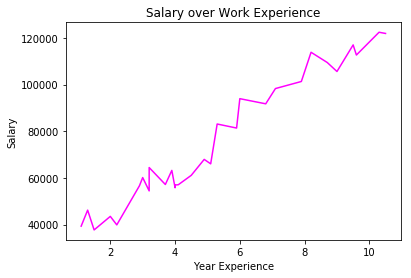

In [308]:
plt.plot(X, y, c='magenta')
# Add title
plt.title("Salary over Work Experience")
# Axis labels
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.show()

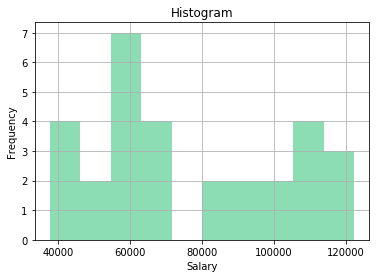

In [309]:
#Histogram
plt.hist(y,color='#8cdcb4')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram')
#Using Grids
plt.grid()
plt.show()

In [310]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [311]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Linear Regression R squared": %.4f' % regressor.score(X_train, y_train))

Linear Regression R squared": 0.9424


In [312]:
#Estimated coefficients for the linear regression
regressor.coef_

array([9360.26128619])

In [313]:
regressor.intercept_ 

26777.391341197632

Linear Regression Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [314]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]
Linear Regression R squared": 0.9741


In [315]:
regressor.coef_*X_test + regressor.intercept_

,YearsExperience
2,40817.783270
28,123188.082589
13,65154.462615
10,63282.410357
26,115699.873560
24,108211.664531
27,116635.899689
11,64218.436486
17,76386.776158


In [316]:
# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 4834.2609


# Ordinary Least Square
* https://en.wikipedia.org/wiki/Ordinary_least_squares

$$
\begin{aligned}
\hat{\beta} = (X^TX)^{-1}X^Ty
\end{aligned}
$$

In [329]:
import statsmodels.formula.api as sm
from numpy.linalg import inv

X_new_train = np.append(arr = np.ones((X_train.shape[0],1)), values = X_train, axis = 1)
X_new_test = np.append(arr = np.ones((X_test.shape[0],1)), values = X_test, axis = 1)

Xinv = inv(np.matmul(X_new.T,X_new))
beta = np.matmul(np.matmul(Xinv,X_new.T),y_train)
print(beta)

[26777.3913412   9360.26128619]


In [331]:
y_pred = np.matmul(X_new_test,beta)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 4834.2609


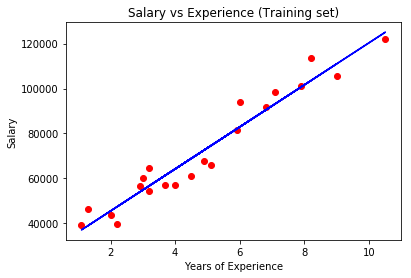

In [325]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') # ture data points
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #regression line
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

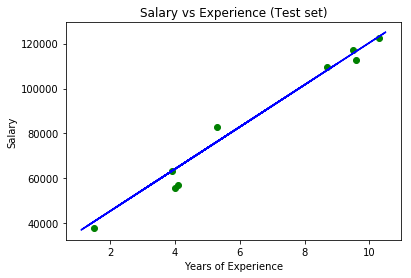

In [326]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()